<font color=blue size=8> ***4<sup> to </sup> Asignación***
<font color=black size=5> ***Cristian Gusseppe Albarracin Caballero-2152859***

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
import scipy.stats as scs
from scipy.stats import pearsonr
%matplotlib inline

In [2]:
Data= ('C:\\Users\\Gusseppe\\Desktop\\Analisis_de_Datos\\Datos\\Datos-azul-timol.xlsx')
dazul= pd.read_excel(Data,sheet_name= "Hoja1", header=1)
dazul.head(18)

,Muestra,Absorbancia,Muestra.1,Absorbancia.1,Muestra.2,Absorbancia.2,[Molar],Longitud de onda,Absorbancia.3
0,Blanco,0.002,Blanco,0.002,Blanco,0.002,0.000000,400.0,0.126
1,Patrón 1,0.100,Patrón 1,0.090,Patrón 1,0.089,0.000003,400.5,0.125
2,Blanco,0.000,Blanco,0.000,Blanco,-0.001,0.000000,401.0,0.122
3,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,0.000010,401.5,0.121
4,Blanco,-0.001,Blanco,-0.001,Blanco,-0.002,0.000000,402.0,0.119
5,Patrón 3,0.484,Patrón 3,0.482,Patrón 3,0.483,0.000017,402.5,0.117
6,Blanco,-0.001,Blanco,0.001,Blanco,0.001,0.000000,403.0,0.115
7,Patrón 4,0.674,Patrón 4,0.660,Patrón 4,0.659,0.000024,403.5,0.114
8,Blanco,0.001,Blanco,0.001,Blanco,0.000,0.000000,404.0,0.112
9,Patrón 5,0.877,Patrón 5,0.877,Patrón 5,0.877,0.000031,404.5,0.110


In [3]:
dazul.columns

Index(['Muestra', 'Absorbancia', 'Muestra.1', 'Absorbancia.1', 'Muestra.2',
       'Absorbancia.2', '[Molar]', 'Longitud de onda', 'Absorbancia.3'],
      dtype='object')

In [4]:
dazul.index

RangeIndex(start=0, stop=801, step=1)

In [5]:
d1= dazul.drop(['Muestra.1', 'Muestra.2', 'Longitud de onda'], axis=1)
d1.head(18)

,Muestra,Absorbancia,Absorbancia.1,Absorbancia.2,[Molar],Absorbancia.3
0,Blanco,0.002,0.002,0.002,0.000000,0.126
1,Patrón 1,0.100,0.090,0.089,0.000003,0.125
2,Blanco,0.000,0.000,-0.001,0.000000,0.122
3,Patrón 2,0.276,0.267,0.267,0.000010,0.121
4,Blanco,-0.001,-0.001,-0.002,0.000000,0.119
5,Patrón 3,0.484,0.482,0.483,0.000017,0.117
6,Blanco,-0.001,0.001,0.001,0.000000,0.115
7,Patrón 4,0.674,0.660,0.659,0.000024,0.114
8,Blanco,0.001,0.001,0.000,0.000000,0.112
9,Patrón 5,0.877,0.877,0.877,0.000031,0.110


In [6]:
d2= d1.drop(index=2)
d3= d2.drop(index=4)
d4= d3.drop(index=6)
d5= d4.drop(index=8)
d6= d5.drop(index=10)
d7= d6.drop(index=12)
d8= d7.drop(index=14)
d9= d8.drop(index=16)
d10=  d9.drop(['Absorbancia.3'], axis=1)
df= d10.drop(['[Molar]'], axis=1)
df.head(10)

,Muestra,Absorbancia,Absorbancia.1,Absorbancia.2
0,Blanco,0.002,0.002,0.002
1,Patrón 1,0.100,0.090,0.089
3,Patrón 2,0.276,0.267,0.267
5,Patrón 3,0.484,0.482,0.483
7,Patrón 4,0.674,0.660,0.659
9,Patrón 5,0.877,0.877,0.877
11,Patrón 6,1.042,1.040,1.040
13,Patrón 7,1.267,1.267,1.266
15,Patrón 8,1.479,1.478,1.477
17,Patrón 9,1.644,1.640,1.688


In [7]:
df['Abs_prom']= (df['Absorbancia']+df['Absorbancia.1']+df['Absorbancia.2'])/3
df.head(10)

,Muestra,Absorbancia,Absorbancia.1,Absorbancia.2,Abs_prom
0,Blanco,0.002,0.002,0.002,0.002000
1,Patrón 1,0.100,0.090,0.089,0.093000
3,Patrón 2,0.276,0.267,0.267,0.270000
5,Patrón 3,0.484,0.482,0.483,0.483000
7,Patrón 4,0.674,0.660,0.659,0.664333
9,Patrón 5,0.877,0.877,0.877,0.877000
11,Patrón 6,1.042,1.040,1.040,1.040667
13,Patrón 7,1.267,1.267,1.266,1.266667
15,Patrón 8,1.479,1.478,1.477,1.478000
17,Patrón 9,1.644,1.640,1.688,1.657333


In [8]:
df['DevStd']= df.std(axis=1)*3
df.head(10)

C:\Users\Gusseppe\AppData\Local\Temp\ipykernel_1868\3813348624.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['DevStd']= df.std(axis=1)*3


,Muestra,Absorbancia,Absorbancia.1,Absorbancia.2,Abs_prom,DevStd
0,Blanco,0.002,0.002,0.002,0.002000,0.000000e+00
1,Patrón 1,0.100,0.090,0.089,0.093000,1.489966e-02
3,Patrón 2,0.276,0.267,0.267,0.270000,1.272792e-02
5,Patrón 3,0.484,0.482,0.483,0.483000,2.449490e-03
7,Patrón 4,0.674,0.660,0.659,0.664333,2.054264e-02
9,Patrón 5,0.877,0.877,0.877,0.877000,3.330669e-16
11,Patrón 6,1.042,1.040,1.040,1.040667,2.828427e-03
13,Patrón 7,1.267,1.267,1.266,1.266667,1.414214e-03
15,Patrón 8,1.479,1.478,1.477,1.478000,2.449490e-03
17,Patrón 9,1.644,1.640,1.688,1.657333,6.523803e-02


In [9]:
x= d10['[Molar]'].head(10)
y= df['Abs_prom'].head(10)
y_error= df['DevStd'].head(10)

In [10]:
corr_test= pearsonr(x, y) 
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9997324137652013
P-value:  2.242299766114718e-14


In [11]:
slope, intercept, r_value, p_value, std_err = scs.linregress(x, y)
print ("slope:", slope)
print ("Intercept:", intercept)
print ("r-squared:", r_value**2)
print ("std_err:", std_err)

slope: 28216.705638365624
Intercept: -0.011029721955896576
r-squared: 0.9994648991327958
std_err: 230.83165653279212


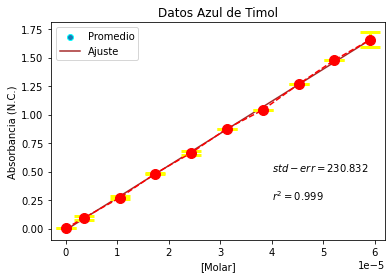

In [12]:
fig, ax= plt.subplots()
ax.scatter(x, y, label='Promedio', edgecolors='cyan')
ax.plot(x, intercept + slope*x, 'brown', label='Ajuste')
ax.legend()
ax.set_title("Datos Azul de Timol")
ax.set_xlabel("[Molar]")
ax.set_ylabel("Absorbancia (N.C.)")
ax.text(0.00004, 0.5, r"$std-err = "+str("{0:.3f}".format(std_err))+r"$", fontsize=10, color="black")
ax.text(0.00004, 0.25, r"$r^2 = "+str("{0:.3f}".format(r_value**2))+r"$", fontsize=10, color="black")
plt.errorbar(x, y, yerr=y_error, fmt= '--ro', ms= 10, ecolor='yellow', elinewidth= 3, capsize= 10, capthick= 3)
#plt.xlim(0, 0.00006)
plt.show()
fig.savefig("Azuk_Timol.png",bbox_inches='tight')

Crudos

In [13]:
Data_Propiedades= ("C:\\Users\\Gusseppe\\Desktop\\Analisis_de_Datos\\Datos\\Informacion Crudos20.xlsx")
Data_Espectros= ("C:\\Users\\Gusseppe\\Desktop\\Analisis_de_Datos\\Datos\\ASCI_IR.xlsx")
dpropiedades= pd.read_excel(Data_Propiedades, sheet_name="Hoja1", header=1)
despectros= pd.read_excel(Data_Espectros, sheet_name="Sheet1", header= 0)
dpropiedades

,N° MUESTRA,DESCRIPCION DE LA MUESTRA,SAMPLE ID,N° de Espectro,ASCI,IN (ASCI),API,Azufre (%w),Saturados(%w),Aromaticos(%w),Resinas(%w),Asfaltenos(%w)
0,1,VASCONIA BLEND,20074030.0,1,9,55,24.5,0.920,31.05,29.15,11.20,4.91
1,2,CAÑO LIMON,200740335.0,2,9,55,30.0,0.437,36.33,32.42,11.68,3.27
2,3,CARGA U 2000,200756527.0,3,12,40,23.6,1.020,34.39,39.84,17.86,3.22
3,4,POZO TRASGO -1,200780676.0,5,10,50,13.4,1.850,29.50,26.00,16.80,10.40
4,5,NUNDA - 1 TUNDA - HUILA,200780694.0,6,10,50,27.2,0.684,30.55,26.04,9.97,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,P105,NaN,105,9,55,NaN,NaN,NaN,NaN,NaN,NaN
79,80,P118,NaN,106,8,60,NaN,NaN,NaN,NaN,NaN,NaN
80,81,P137,NaN,107,10,50,NaN,NaN,NaN,NaN,NaN,NaN
81,82,P177,NaN,108,11,45,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
despectros

,10,10.1,13,11,11.1,14,10.2,14.1,16,18,...,9,13.5,11.7,12.8,13.6,8.1,10.6,9.1,11.8,12.9
0,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
1,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
2,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
3,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
4,0.010022,0.012352,0.017360,0.015276,0.006081,0.008482,0.012639,0.026994,0.009770,0.015676,...,0.034033,0.026838,0.018222,0.012398,0.038242,0.011025,0.014117,0.019159,0.016641,0.035521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,0.007530,0.003969,0.000003,0.011448,0.003147,0.007675,0.000036,0.000014,0.005132,0.000014,...,0.000014,0.008548,0.006177,0.000067,0.000043,0.000535,0.011689,0.011839,0.004210,0.000015
7464,0.007522,0.003970,0.000000,0.011453,0.003144,0.007688,0.000037,0.000009,0.005135,0.000016,...,0.000013,0.008553,0.006172,0.000068,0.000029,0.000533,0.011687,0.011844,0.004211,0.000013
7465,0.007512,0.003973,0.000001,0.011460,0.003142,0.007699,0.000038,0.000005,0.005138,0.000017,...,0.000011,0.008556,0.006168,0.000068,0.000017,0.000533,0.011686,0.011849,0.004208,0.000010
7466,0.007503,0.003975,0.000006,0.011469,0.003143,0.007707,0.000037,0.000002,0.005140,0.000017,...,0.000006,0.008556,0.006164,0.000069,0.000007,0.000534,0.011684,0.011856,0.004203,0.000005


In [15]:
dpropiedades.shape, despectros.shape

((83, 12), (7468, 82))

In [16]:
dpropiedades.index

RangeIndex(start=0, stop=83, step=1)

Debido a que la manera en la que está escrita el archivo la cantidad de renglones en los dos no coinciden por lo que se debe eliminar una fila del archivo de propiedades para que la cantidad de renglones ("rows") en los dos archivos sea la misma luego de realizar una trasnpuesta del archivo de espectros. Adicionalmente se deben eliminar de los dos archivos las muestras que no poseen datos en el apartado de porcentaje en peso de azufre ('Azufre (%w)') ya que es la propiedad que se desea estudiar y un reglon extra.

In [17]:
dpropiedades= dpropiedades.drop(index=82)
dpropiedades= dpropiedades.drop(index=81)
dpropiedades= dpropiedades.drop(index=80)
dpropiedades= dpropiedades.drop(index=79)
dpropiedades= dpropiedades.drop(index=78)
dpropiedades= dpropiedades.drop(index=77)
dpropiedades= dpropiedades.drop(index=76)
dpropiedades= dpropiedades.drop(index=75)
dpropiedades= dpropiedades.drop(index=74)
dpropiedades= dpropiedades.drop(index=73)
dpropiedades= dpropiedades.drop(index=72)
dpropiedades= dpropiedades.drop(index=71)
dpropiedades= dpropiedades.drop(index=70)
dpropiedades= dpropiedades.drop(index=69)
dpropiedades= dpropiedades.drop(index=68)
dpropiedades= dpropiedades.drop(index=67)
dpropiedades= dpropiedades.drop(index=60)
dpropiedades= dpropiedades.drop(index=55)
dpropiedades= dpropiedades.drop(index=44)
dpropiedades= dpropiedades.drop(index=43)
dpropiedades= dpropiedades.drop(index=36)
dpropiedades= dpropiedades.drop(index=25)
dpropiedades= dpropiedades.drop(index=21)
#dpropiedades= dpropiedades.drop(index=15)
dpropiedades= dpropiedades.drop(['N° MUESTRA'], axis=1)
dpropiedades= dpropiedades.drop(['DESCRIPCION DE LA MUESTRA'], axis=1)
dpropiedades= dpropiedades.drop(['SAMPLE ID'], axis=1)
dpropiedades= dpropiedades.drop(['N°  de Espectro'], axis=1)
dpropiedades= dpropiedades.drop(['ASCI'], axis=1)
dpropiedades= dpropiedades.drop(['IN (ASCI)'], axis=1)
dpropiedades= dpropiedades.drop(['API '], axis=1)
dpropiedades= dpropiedades.drop(['Saturados(%w) '], axis=1)
dpropiedades= dpropiedades.drop(['Aromaticos(%w) '], axis=1)
dpropiedades= dpropiedades.drop(['Resinas(%w) '], axis=1)
dpropiedadesF= dpropiedades.drop(['Asfaltenos(%w) '], axis=1)
dpropiedadesF.shape

(60, 1)

In [18]:
despectrosT= np.transpose(despectros)
despectrosT

,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
10,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
10.1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
13,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
11,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
11.1,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.1,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,0.009647,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
10.6,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,0.013171,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
9.1,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,0.021586,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863
11.8,0.012098,0.013569,0.014856,0.015892,0.016641,0.017102,0.017313,0.017343,0.017274,0.017184,...,0.004172,0.004182,0.004192,0.004201,0.004207,0.004210,0.004211,0.004208,0.004203,0.004196


In [19]:
despectrosT.index

Index([     10,  '10.1',      13,      11,  '11.1',      14,  '10.2',  '14.1',
            16,      18,  '16.1',      12,      15,      17,  '10.3',  '12.1',
        '12.2',  '12.3',  '15.1',      19,  '15.2',  '11.2',  '12.4',  '17.1',
        '11.3',  '11.4',  '16.2',  '19.1',      20,  '16.3',  '13.1',  '15.3',
        '13.2',  '14.2',  '13.3',       5,  '11.5',  '12.5',  '18.1',  '15.4',
        '17.2',  '16.4',  '17.3',  '12.6',  '17.4',       8,  '17.5',  '17.6',
        '17.7',  '17.8',       6,  '17.9',  '12.7',  '15.5',  '14.3',  '20.1',
        '20.2',  '11.6',  '16.5', '17.10', '17.11',  '13.4',  '15.6',  '16.6',
        '15.7',  '14.4',  '15.8',  '10.4',  '20.3',  '14.5',  '20.4',  '10.5',
             9,  '13.5',  '11.7',  '12.8',  '13.6',   '8.1',  '10.6',   '9.1',
        '11.8',  '12.9'],
      dtype='object')

In [20]:
despectrosT= despectrosT.drop(index='12.9')
despectrosT= despectrosT.drop(index='11.8')
despectrosT= despectrosT.drop(index='9.1')
despectrosT= despectrosT.drop(index='10.6')
despectrosT= despectrosT.drop(index='8.1')
despectrosT= despectrosT.drop(index='13.6')
despectrosT= despectrosT.drop(index='12.8')
despectrosT= despectrosT.drop(index='11.7')
despectrosT= despectrosT.drop(index='13.5')
despectrosT= despectrosT.drop(index=9)
despectrosT= despectrosT.drop(index='10.5')
despectrosT= despectrosT.drop(index='20.4')
despectrosT= despectrosT.drop(index='14.5')
despectrosT= despectrosT.drop(index='20.3')
despectrosT= despectrosT.drop(index='10.4')
despectrosT= despectrosT.drop(index='15.8')
despectrosT= despectrosT.drop(index='17.10')
despectrosT= despectrosT.drop(index='12.6')
despectrosT= despectrosT.drop(index='17.3')
despectrosT= despectrosT.drop(index=5)
despectrosT= despectrosT.drop(index='11.3')
despectrosT= despectrosT.drop(index='15.2')
despectrosT

,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
10,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,7.545819e-03,0.007545,0.007542,0.007537,7.530447e-03,0.007522,7.512009e-03,0.007503,7.494229e-03
10.1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,3.966483e-03,0.003967,0.003967,0.003967,3.968649e-03,0.003970,3.972981e-03,0.003975,3.975580e-03
13,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,3.526030e-05,0.000026,0.000016,0.000008,2.548841e-06,0.000000,1.274419e-06,0.000006,1.274435e-05
11,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,1.146486e-02,0.011455,0.011450,0.011447,1.144849e-02,0.011453,1.145981e-02,0.011469,1.148033e-02
11.1,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,3.165104e-03,0.003163,0.003158,0.003152,3.147346e-03,0.003144,3.142148e-03,0.003143,3.144747e-03
14,0.006935,0.007533,0.008007,0.008331,0.008482,0.008453,0.008236,0.007844,0.007311,0.006703,...,0.007645,7.642930e-03,0.007645,0.007651,0.007662,7.675187e-03,0.007688,7.699381e-03,0.007707,7.710565e-03
10.2,0.016425,0.015106,0.013928,0.013067,0.012639,0.012648,0.012992,0.013508,0.014046,0.014525,...,0.000033,2.996445e-05,0.000029,0.000031,0.000033,3.552951e-05,0.000037,3.766993e-05,0.000037,3.638567e-05
14.1,0.025610,0.025668,0.025952,0.026408,0.026994,0.027671,0.028401,0.029129,0.029793,0.030338,...,0.000061,4.856126e-05,0.000038,0.000029,0.000021,1.440320e-05,0.000009,4.938185e-06,0.000002,0.000000e+00
16,0.011233,0.010532,0.010026,0.009778,0.009770,0.009901,0.010021,0.009995,0.009744,0.009277,...,0.005115,5.119202e-03,0.005122,0.005125,0.005128,5.131982e-03,0.005135,5.138307e-03,0.005140,5.141381e-03
18,0.015542,0.015678,0.015707,0.015686,0.015676,0.015717,0.015814,0.015947,0.016107,0.016321,...,0.000000,8.426448e-07,0.000003,0.000007,0.000011,1.432518e-05,0.000016,1.727454e-05,0.000017,1.516786e-05


In [21]:
dpropiedadesF.shape, despectrosT.shape

((60, 1), (60, 7468))

In [22]:
scaler=StandardScaler()
norma=Normalizer()

In [23]:
scaler.fit(despectrosT)
x_scaled=scaler.transform(despectrosT)
x_norm= preprocessing.normalize(despectrosT, norm= 'l1')
x_nsd= savgol_filter(x_norm, 17, polyorder=2, deriv= 2)

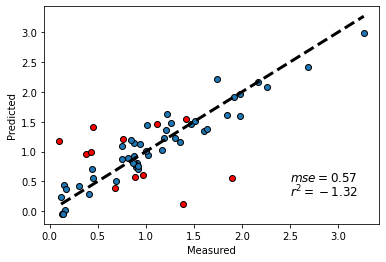

MSE = 0.57


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, dpropiedadesF, train_size=0.8, random_state=4, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(2.5, 0.5,r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(2.5, 0.25, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

Realizamos los calculos necesarioas para mejorar el modelo, ya que la bondad del ajuste "r2" es muy pobre, un valor de -1.32, la cantidad aceptada es 0.8

In [25]:
def optimise_pls(X, y, xt, n_comp):
    
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

Debido a la gran cantidad de datos se límita el modelo a una cantidad menor con el proposito de mejorar el modelo, se tomaran únicamente 20 muestras .

In [26]:
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 20)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

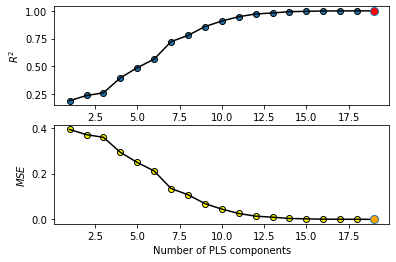

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

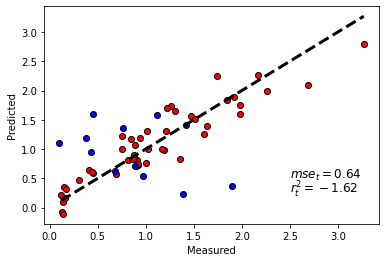

MSE = 0.07


In [28]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='red', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(2.5, 0.5, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(2.5, 0.25, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))